<a href="https://colab.research.google.com/github/jclauss24/MTLSA_Project/blob/main/Analysis/ARIMA_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data.csv')

In [8]:
data.head()

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,2025-03-14,315.493,9871.433801,330.159478,9884.680244,9709.470078,165.49,31995890,211.250,166.4900,162.45,213.9500,60107580,211.250,213.9500,209.58
1,2025-03-13,315.493,9541.274322,-169.153609,9716.739851,9476.858596,162.76,31756210,215.950,166.1300,162.11,216.8394,61368330,215.950,216.8394,208.42
2,2025-03-12,315.493,9710.427932,126.454775,9841.303834,9611.226680,167.11,28372400,220.140,167.6399,163.53,221.7500,62547470,220.140,221.7500,214.91
3,2025-03-11,315.493,9583.973157,35.421132,9740.399484,9449.367405,164.04,39587410,223.805,166.7500,161.37,225.8399,76137410,223.805,225.8399,217.45
4,2025-03-10,315.493,9548.552025,-495.741338,9815.136880,9448.979167,165.87,43604030,235.540,168.4600,163.69,236.1600,72071200,235.540,236.1600,224.22


### Testing partial autocorrelation:

"this will help you choose the value of the parameter p in the ARIMA model: p=N where N is the largest statistically significant lag in the partial autocorrelation"

In [14]:
colNames = data.columns
print(colNames)

Index(['Date', 'CPI', 'IndexValue_NDXT', 'NetChange_NDXT', 'High_NDXT',
       'Low_NDXT', 'Close/Last_GOOGL', 'Volume_GOOGL', 'Open_GOOGL',
       'High_GOOGL', 'Low_GOOGL', 'Close/Last_AAPL', 'Volume_AAPL',
       'Open_AAPL', 'High_AAPL', 'Low_AAPL'],
      dtype='object')


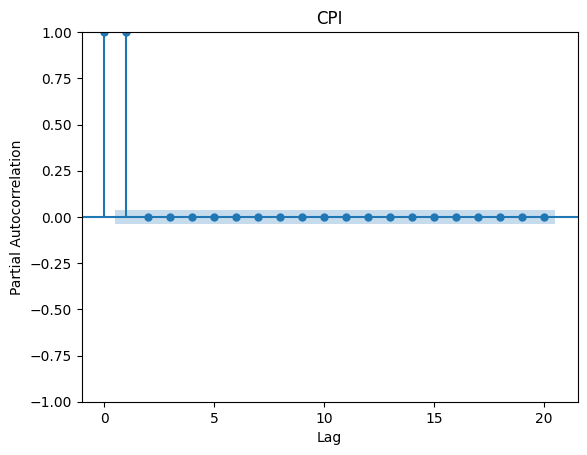

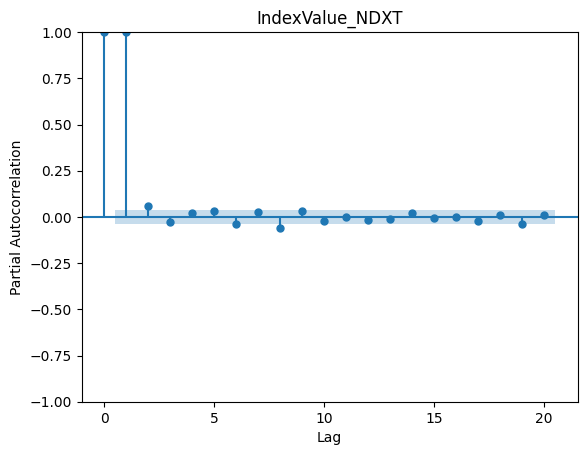

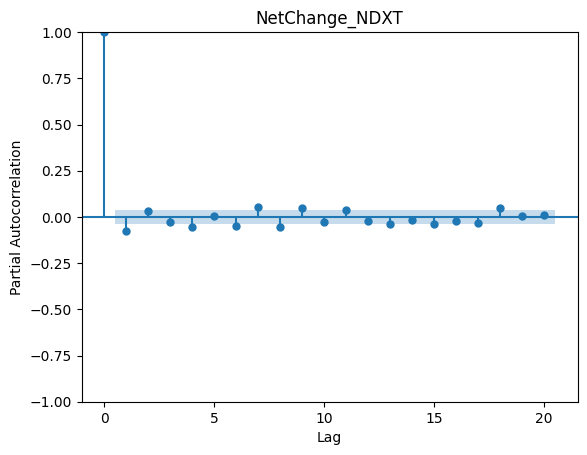

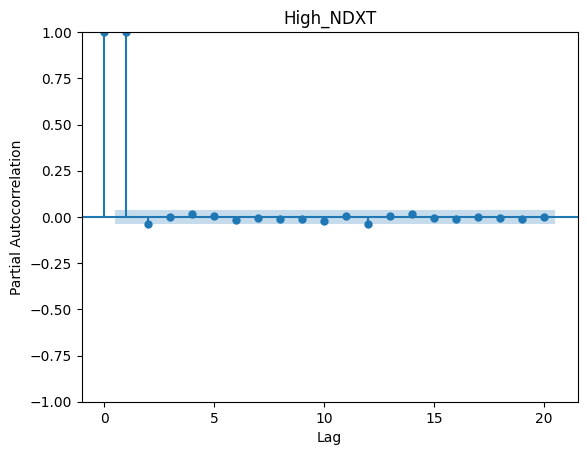

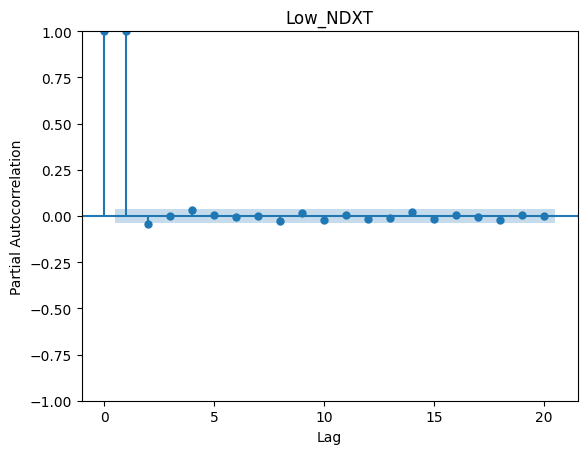

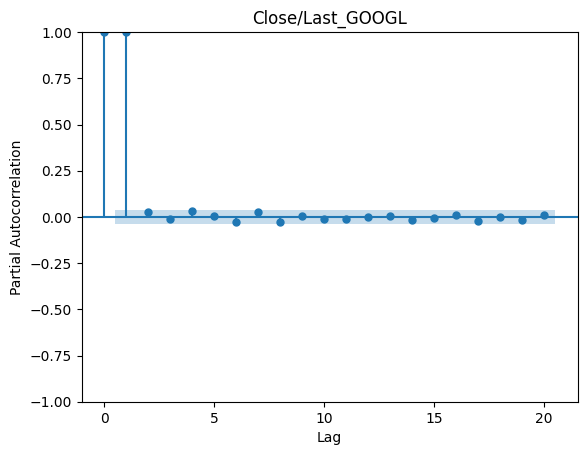

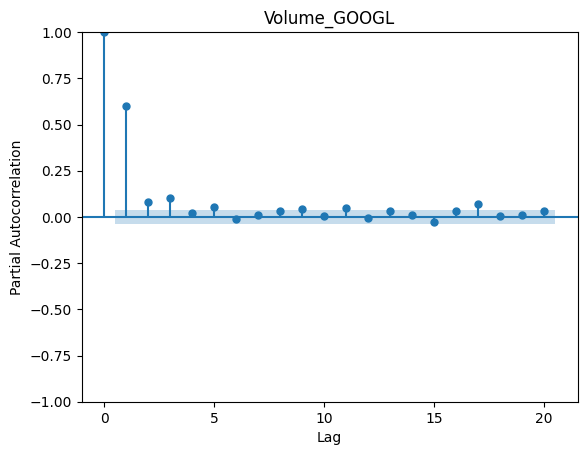

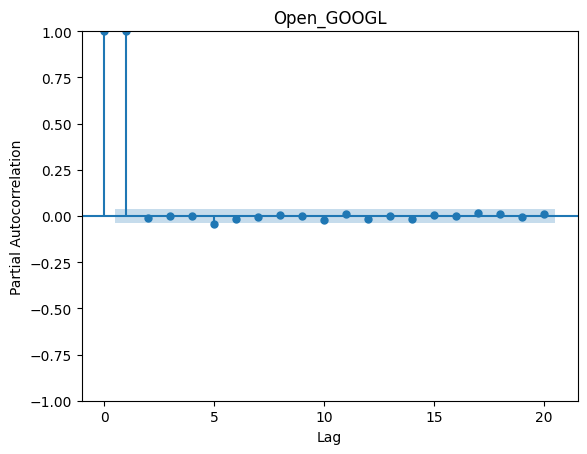

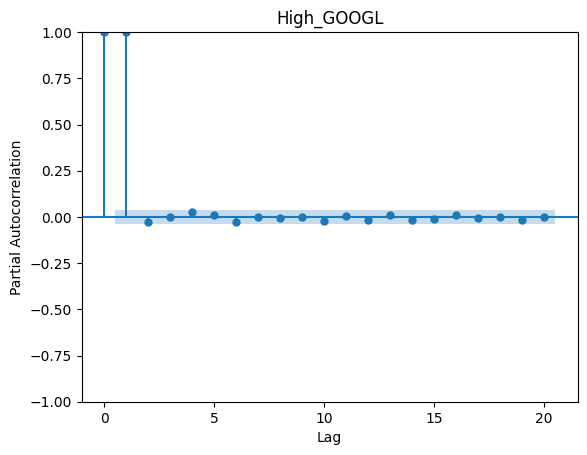

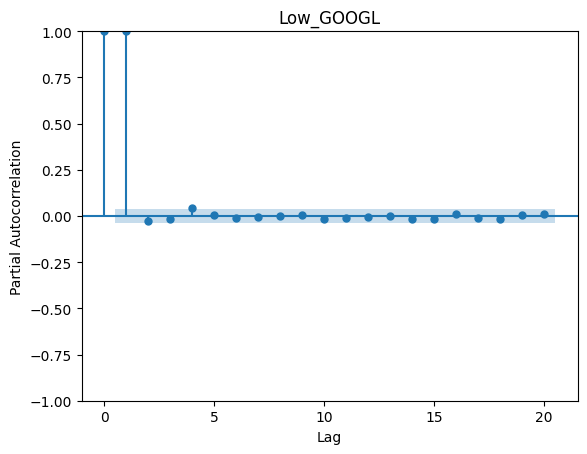

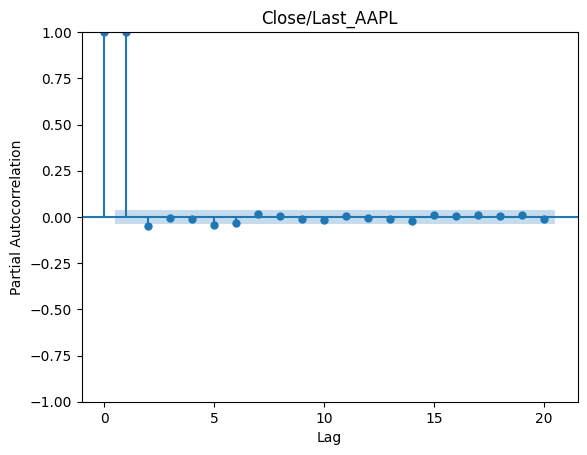

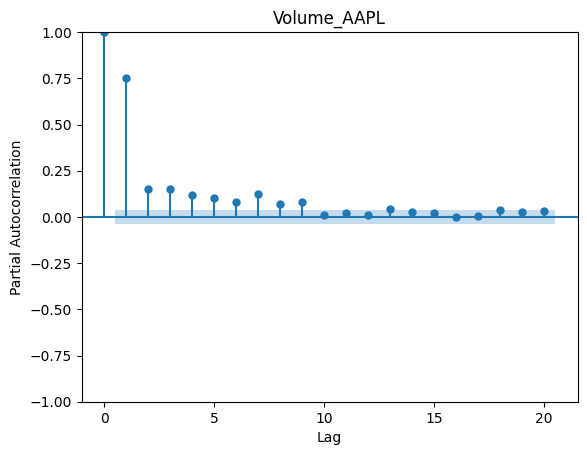

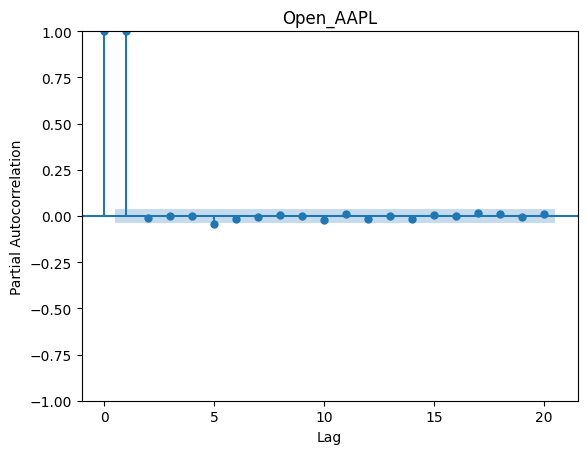

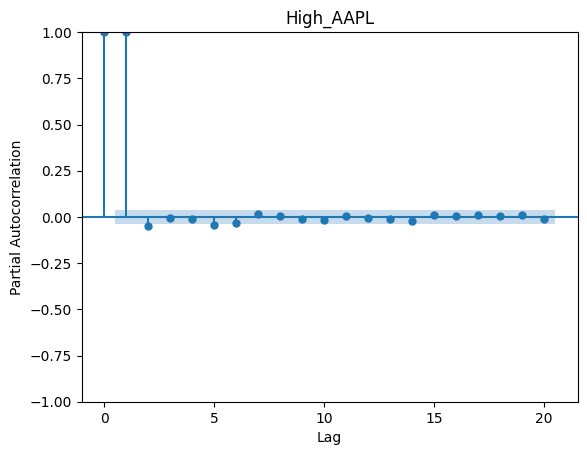

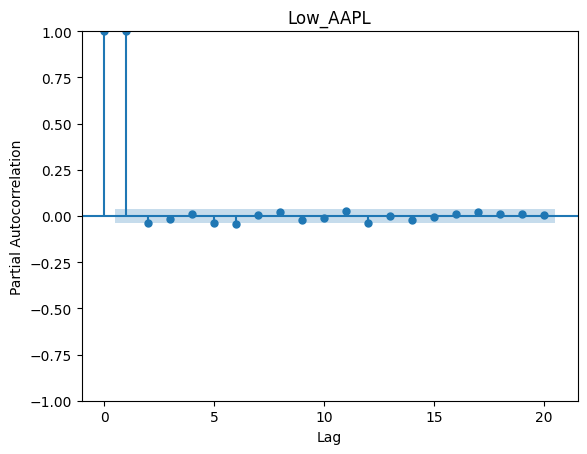

In [16]:
# partial autocorrelation plot
# maxlist=[]

for i in range(1, len(data.columns)):
  sm.graphics.tsa.plot_pacf(data[colNames[i]], lags=20);
  plt.title(colNames[i])
  plt.xlabel('Lag')
  plt.ylabel('Partial Autocorrelation')
  plt.show()

### Testing for Stationarity:
"this will allow you to choose the parameter i in the ARIMA model: i=0 for stationary time series, i=1 for non stationary time series"

In [22]:
dataNew = data.drop(['Date'], axis=1)
dataNew.head()

,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,315.493,9871.433801,330.159478,9884.680244,9709.470078,165.49,31995890,211.250,166.4900,162.45,213.9500,60107580,211.250,213.9500,209.58
1,315.493,9541.274322,-169.153609,9716.739851,9476.858596,162.76,31756210,215.950,166.1300,162.11,216.8394,61368330,215.950,216.8394,208.42
2,315.493,9710.427932,126.454775,9841.303834,9611.226680,167.11,28372400,220.140,167.6399,163.53,221.7500,62547470,220.140,221.7500,214.91
3,315.493,9583.973157,35.421132,9740.399484,9449.367405,164.04,39587410,223.805,166.7500,161.37,225.8399,76137410,223.805,225.8399,217.45
4,315.493,9548.552025,-495.741338,9815.136880,9448.979167,165.87,43604030,235.540,168.4600,163.69,236.1600,72071200,235.540,236.1600,224.22


In [23]:
significance_threshold = 0.05
stationary_list=[] #0 is false 1 is true
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in dataNew.columns:
  unittest = sm.tsa.stattools.adfuller(dataNew[c])
  print(c, unittest) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb
  print(f"statistics value: {unittest[0]}")
  print(f"p-value: {unittest[1]}")
  print(f"is p-value < {significance_threshold}? {unittest[1]<significance_threshold}")
  print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
  print(f"\nis it stationary? {unittest[1]<significance_threshold}")
  if unittest[1]<significance_threshold:
    stationary_list.append(1)
  else:
    stationary_list.append(0)

stationary_list

Stationarity results from the AD Fuller test at a p-value of 0.05
CPI (np.float64(-1.6370564356586939), np.float64(0.4637993011654799), 1, 2514, {'1%': np.float64(-3.4329538144697187), '5%': np.float64(-2.8626903542179405), '10%': np.float64(-2.567382377622466)}, np.float64(-16602.21770918603))
statistics value: -1.6370564356586939
p-value: 0.4637993011654799
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
IndexValue_NDXT (np.float64(-1.4381542733650718), np.float64(0.5638540490504419), 26, 2489, {'1%': np.float64(-3.4329799947351503), '5%': np.float64(-2.862701915447137), '10%': np.float64(-2.5673885329713495)}, np.float64(30349.65822155431))
statistics value: -1.4381542733650718
p-value: 0.5638540490504419
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
NetChange_NDXT (np.float64(-11.826218476212679), np.float64(8.19153607225927e-22), 25, 2490, {'1%': np.float64(-3.4329789374204935), '5%': np.float64(-2.8627014485379787), '1

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]

Stationary: net change in NDXT, volume of Google, volume of Apple

### Getting ARIMA of all data:

In [ ]:
# to run the model for 1 column:

column_name = colNames[1]
N_test = 60
p = 7
i = stationary_list[1-1]
q = 3 # picking this as 3 for now ig

print("information for " + str(column_name))
arima_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()